# Parameterisation

Once the potential energy function to be used for a particular interaction has been determined, it is then necessary to **parameterise** the function. 

If we consider the Lennard-Jones potential model.
In this model it is necessary to determine two parameters, $\sigma$ and $\varepsilon$. 
$\sigma$ is the distance at which the potential energy between the two particles is zero, $-\varepsilon$ is the potential energy at the equilbrium separation. 
Both of these numbers must be determined for a pair of atoms. 
This is achieved by **parameterisation**.

## How to parameterise a potential model?

The purpose of parameterisation is to create a potential energy model that is able to **accurately reproduce** the energy of a given interaction. 
This may also be thought of as the model that reproduces the structure accurately. 
This means that the parameters should really be obtained by optimising them with respect to a **more accurate** technique than classical simulation. 
Commonly this involves either experimental measurements, e.g. X-ray crystallography, or quantum mechanical calculations; we will be focusing on the latter. 

More can be found out about quantum mechanical calculations in the textbooks mentioned in the introduction (in particular Jeremy Harvey's Computational Chemistry Primer [[1](#references)]).
However, for our current purposes we only need to remember that quantum calculations are more accurate than classical simulations.

### Quantum mechanical calculations

These are more accurate then classical simulations. However, they are severely limited in the system size, with a maximum simulation size in the order of hundreds or thousands of atoms. 

### Parameterising a Lennard-Jones interaction

We will stick with the example of a Lennard-Jones interaction, however the arguments and methods discussed are **extensible to all different interaction types**. 
To generate the potential energy model between two particles of argon, we could conduct quantum mechanical calculations at a range of inter-atom separations, from 3 to 8 Å, finding the energy between the two particles at each separation.

The Python code below plots the energy vs distances that may be obtained from a quantum mechanical calculation. 

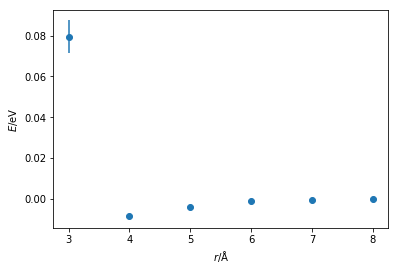

In [18]:
import matplotlib.pyplot as plt
import numpy as np

r = [3, 4, 5, 6, 7, 8]
energy = [0.0794, -0.0084, -0.0040, -0.0009, -0.0004, -0.0002]
energy_err = [81e-04, 9e-04, 3e-04, 1e-04, 1e-04, 1e-04]

plt.errorbar(r, energy, yerr=energy_err, marker='o', ls='')
plt.xlabel(r'$r$/Å')
plt.ylabel(r'$E$/eV')
plt.show()

We can already see that the general shape of the curve is similar to a Lennard-Jones (or Buckingham) interaction.
There is a well at the **equilibrium bond distance** and a steep incline as the particles come **too close** together. 
It is possible to then fit a Lennard-Jones function to this data, the Python code below does this using a simple least-squares fit.

In [19]:
from scipy.optimize import curve_fit

def lj_energy(r, epsilon, sigma):
    """
    Implementation of the Lennard-Jones potential 
    to calculate the energy of the interaction.
    
    Parameters
    ----------
    r: float
        Distance between two particles (Å)
    epsilon: float 
        Potential energy at the equilibrium bond length (eV)
    sigma: float 
        Distance at which the potential energy is zero (Å)
    
    Returns
    -------
    float
        Energy of the van der Waals interaction
    """
    return 4 * epsilon * np.power(
        sigma / r, 12) - 4 * epsilon * np.power(sigma / r, 6)

popt, pcov = curve_fit(lj_energy, r, energy, sigma=energy_err)
print('Best value for ε = {:.2e} eV'.format(popt[0]))
print('Best value for σ = {:.2f} Å'.format(popt[1]))

Best value for ε = 9.15e-03 eV
Best value for σ = 3.38 Å


If we plot a Lennard-Jones function with the values fitted and the quantum mechnical data on a single plot, we can see that there is **relatively good agreement** between the two. 
However, there is some deviation at 4 and 5 Å indicating more quantum mechnical calculations would **required** to produce a truely representative forcefield. 

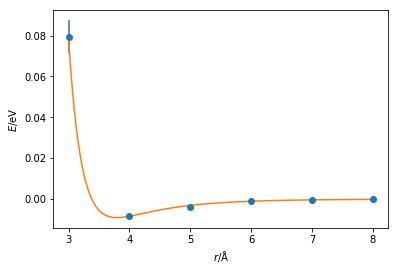

In [20]:
plt.errorbar(r, energy, yerr=energy_err, marker='o', ls='')
x = np.linspace(3, 8, 1000)
plt.plot(x, lj_energy(x, popt[0], popt[1]))
plt.xlabel(r'$r$/Å')
plt.ylabel(r'$E$/eV')
plt.show()

Note that it would be necessary to carry out this process for **every** interaction in your system, e.g. bond lengths, bond angles, dihedral angles, van der Waals and Coulombic interactions forces, etc. 
Furthermore, it is important to remember the **different chemistry** that is present for each atom. 
For example, a carbon atom in a carbonyl group will not display the same behaviour as the carbon atom in a methane molecule. 
To carry out these calculations for *every* molecular dynamics simulation that you wish to perform very quickly becomes highly unfeasible if we want to apply classical simulation regularly.

## References

1. Harvey, J. *Computational Chemistry*; Oxford University Press: Oxford, 2018.